In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer

In [2]:
df=pd.read_csv('quikr_car.csv')

In [3]:
for i in range(df.shape[0]):
    if(~df['year'][i].isnumeric()):
        df['year'][i]=df[df['year'].str.isnumeric()]['year'].sample().values[0]

In [4]:
df['kms_driven']=df['kms_driven'].str.split(' ').str.get(0).str.replace(',','')
df['Price'] = df['Price'].str.replace(',','')


In [5]:

mean_p =df[df['Price']!='Ask For Price']['Price'].astype(int).mean()
print(mean_p)

mean_km = df[df['kms_driven']!='Petrol']['kms_driven'].dropna().astype(int).mean()
print(mean_km)

df['kms_driven'] = df['kms_driven'].fillna(mean_km)
df['name'] = df['name'].str.split(' ').str.slice(0,3).str.join(' ')

df['year'] = pd.to_numeric(df['year'], errors='coerce')

trans = ColumnTransformer(transformers = [
    ('tnf1',SimpleImputer(strategy='constant',fill_value=mean_km,missing_values='Petrol'),['kms_driven']),
    ('tnf2',SimpleImputer(strategy='most_frequent'),['fuel_type']),
    ('tnf3',SimpleImputer(strategy='constant',missing_values='Ask For Price',fill_value=mean_p),['Price'])
],remainder='passthrough')

df = pd.DataFrame(trans.fit_transform(df),columns=['kms_driven','fuel_type','Price','name','company','year'])


404688.5344224037
46010.55011933174


In [6]:

trans1 = ColumnTransformer(transformers = [
    ('tnf3',OneHotEncoder(drop='first',sparse_output=True),['fuel_type']),
],remainder='passthrough')

df = pd.DataFrame(trans1.fit_transform(df),columns=['petrol','diesel','kms_driven','Price','name','company','year'])


In [7]:

df['kms_driven'] = df['kms_driven'].astype(float)
df['petrol'] = df['petrol'].astype(int)
df['diesel'] = df['diesel'].astype(int)
df['Price'] = df['Price'].astype(int)
df


,petrol,diesel,kms_driven,Price,name,company,year
0,0,1,45000.000000,80000,Hyundai Santro Xing,Hyundai,2009
1,0,0,40.000000,425000,Mahindra Jeep CL550,Mahindra,2015
2,0,1,22000.000000,404688,Maruti Suzuki Alto,Maruti,2010
3,0,1,28000.000000,325000,Hyundai Grand i10,Hyundai,2012
4,0,0,36000.000000,575000,Ford EcoSport Titanium,Ford,2014
...,...,...,...,...,...,...,...
887,0,1,46010.550119,310000,Ta,Tara,2017
888,0,0,27000.000000,260000,Tata Zest XM,Tata,2016
889,0,0,40000.000000,390000,Mahindra Quanto C8,Mahindra,2018
890,0,1,46010.550119,180000,Honda Amaze 1.2,Honda,2015


In [8]:
#FUNCTION TRANSFORMER
df['year'] = pd.to_numeric(df['year'], errors='coerce')

In [9]:
df['year'].dtype

dtype('int64')

<Axes: >

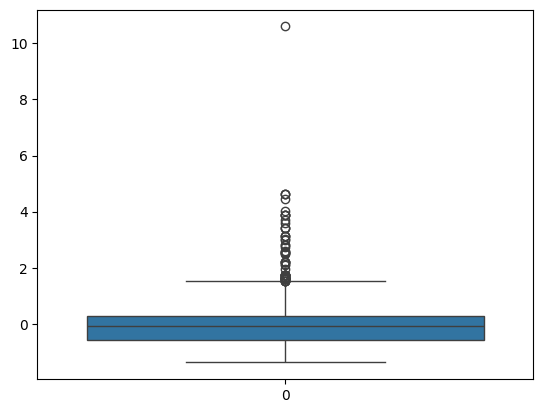

In [10]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
sns.boxplot(ss.fit_transform(df[['kms_driven']]))

<Axes: ylabel='kms_driven'>

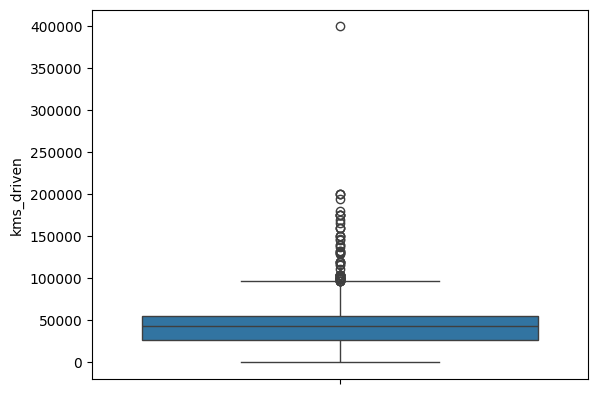

In [11]:
sns.boxplot(df['kms_driven'])

In [12]:

ft=FunctionTransformer(np.log)
t=ColumnTransformer(transformers=[
    ('t',ft,['year'])
],remainder='passthrough')
t.fit_transform(df)
# df['year'].plot(kind='kde')
df.info()

# high = df['year'].mean() + 3*df['year'].std()
# low = df['year'].mean() - 3*df['year'].std()

# df['year'] = np.where(
#     df['year']>high,
#     high,
#     np.where(
#         df['year']<low,
#         low,
#         df['year']
#     )
# )

# high = df['kms_driven'].mean() + 3*df['kms_driven'].std()
# low = df['kms_driven'].mean() - 3*df['kms_driven'].std()

# df['kms_driven'] = np.where(
#     df['kms_driven']>high,
#     high,
#     np.where(
#         df['kms_driven']<low,
#         low,
#         df['kms_driven']
#     )
# )


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   petrol      892 non-null    int32  
 1   diesel      892 non-null    int32  
 2   kms_driven  892 non-null    float64
 3   Price       892 non-null    int32  
 4   name        892 non-null    object 
 5   company     892 non-null    object 
 6   year        892 non-null    int64  
dtypes: float64(1), int32(3), int64(1), object(2)
memory usage: 38.5+ KB


count       892.000000
mean      46010.550119
std       33408.767337
min           0.000000
25%       27000.000000
50%       43000.000000
75%       55000.000000
max      400000.000000
Name: kms_driven, dtype: float64

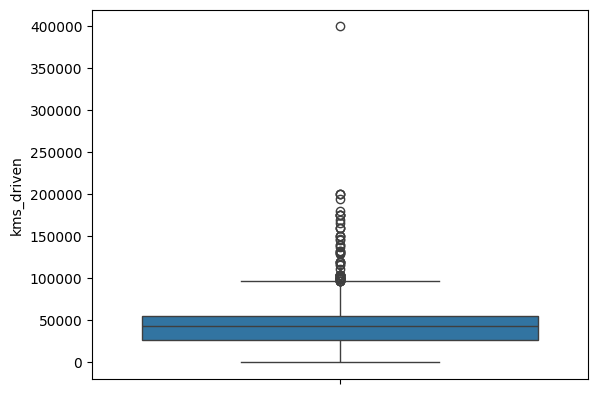

In [13]:

sns.boxplot(df['kms_driven'])
# print(high,low)
df['kms_driven'].describe()


In [14]:
q1 = df.kms_driven.quantile(0.25)
q2 = df.kms_driven.quantile(0.75)
iqr = q2-q1
iqr

28000.0

In [15]:
df['kms_driven'].count()

892

In [16]:
high = q2+1.5*iqr
low = q1-1.5*iqr
df = df.loc[df['kms_driven']>=q2]
df.describe()

,petrol,diesel,kms_driven,Price,year
count,247.000000,247.000000,247.000000,2.470000e+02,247.000000
mean,0.008097,0.376518,83755.647773,3.099174e+05,2012.485830
std,0.089801,0.485496,38268.907816,2.696689e+05,3.781481
min,0.000000,0.000000,55000.000000,3.000000e+04,2000.000000
25%,0.000000,0.000000,60000.000000,1.275000e+05,2011.000000
50%,0.000000,0.000000,70000.000000,2.400000e+05,2013.000000
75%,0.000000,1.000000,97000.000000,3.850000e+05,2015.000000
max,1.000000,1.000000,400000.000000,1.525000e+06,2019.000000


<Axes: ylabel='kms_driven'>

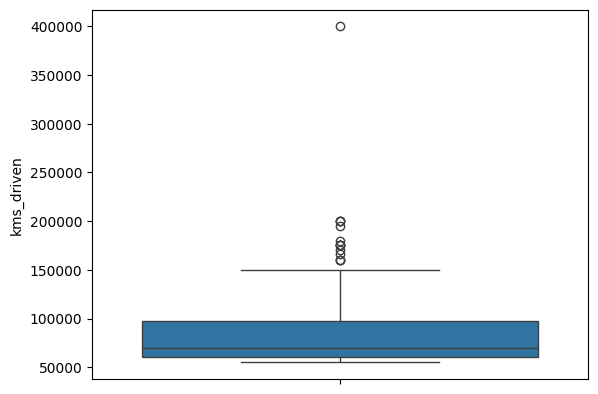

In [17]:
sns.boxplot(df['kms_driven'])

In [18]:
trann = ColumnTransformer(transformers=[
    ('t1',OneHotEncoder(drop='first',sparse_output=True),['company','name'])
],remainder='passthrough')
trann.fit(df.drop(columns=['Price']))
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 247 entries, 5 to 886
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   petrol      247 non-null    int32  
 1   diesel      247 non-null    int32  
 2   kms_driven  247 non-null    float64
 3   Price       247 non-null    int32  
 4   name        247 non-null    object 
 5   company     247 non-null    object 
 6   year        247 non-null    int64  
dtypes: float64(1), int32(3), int64(1), object(2)
memory usage: 12.5+ KB


In [19]:
# X_train = trann.transform(X_train)
# X_test = trann.transform(X_test)
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
lr=RandomForestRegressor()
# lr.fit(X_train,y_train)
# y_pred = lr.predict(X_test)
# from sklearn.metrics import r2_score
# r2_score(y_pred,y_test)


X=df.drop(columns=['Price'])
y=pd.DataFrame(df['Price'],columns=['Price'])
y
X = trann.transform(X)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr,X,y,cv=10,scoring='r2')


c:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: 

In [20]:
scores.mean()

0.32631406502271654

<Axes: ylabel='Density'>

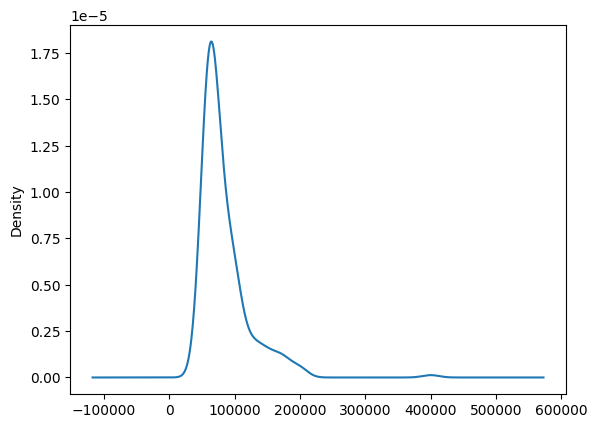

In [21]:
# sns.boxplot(df['kms_driven'])
df['kms_driven'].plot(kind='kde')

In [22]:
# from sklearn.preprocessing import OneHotEncoder
# ohe=OneHotEncoder(drop='first',dtype=np.int32)
# X_train_new = ohe.fit_transform(X_train[['fuel_type']]).toarray()
# X_test_new = ohe.transform(X_test[['fuel_type']]).toarray()
# X_train_new